In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df=pd.read_csv("tracks.csv")
# Display the first few rows of the dataset to understand its structure
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
# Print concise summary of df_tracks DataFrame including column names, data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
# Check for nulls
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
# Remove null Values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [9]:
# To Check for duplicates
df.duplicated().sum()

0

In [7]:
# Calculate 'duration' in seconds from 'duration_ms' column,
# rounding to nearest second, and assign to new column 'duration'.
df["duration"]= df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms", inplace=True, axis=1)
df.head()

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [8]:
# Set 'release_date' column as the index of df_tracks DataFrame
df.set_index("release_date", inplace=True)
df.index=pd.to_datetime(df.index)
df.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


In [69]:
# Top 10 records by Popularity
sort = df[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=False)
sort.head(10)

,name,artists,popularity
release_date,,,
2021-03-19,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
2021-01-08,drivers license,['Olivia Rodrigo'],99
2021-01-06,Astronaut In The Ocean,['Masked Wolf'],98
2020-12-04,telepatía,['Kali Uchis'],97
2020-03-20,Save Your Tears,['The Weeknd'],97
2021-03-05,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
2020-03-20,Blinding Lights,['The Weeknd'],96
2020-09-16,The Business,['Tiësto'],95
2021-02-04,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94


In [21]:
# Top 10 least records by Popularity
sortleast = df[['name', 'artists', 'popularity']].sort_values(by='popularity', ascending=True)
sortleast.head(10)

,name,artists,popularity
release_date,,,
1934-01-01,You and the night and the music,"['Libby Holman & Her Orchestra', 'Libby Holman']",0
1923-01-01,Roses of Picardy,['Paul Specht'],0
1923-01-01,I'm the last of the red hot mamas,['Sophie Tucker'],0
1923-01-01,Snakes hips,['The Georgians'],0
1923-01-01,The man I love,"['Sophie Tucker', 'Miff Mole']",0
1923-01-01,I'll Have Vanilla,['Eddie Cantor'],0
1923-01-01,Little Curly Hair In a High Chair,"['Jerry Joyce', 'Eddie Cantor']",0
1923-01-01,The Grass Grows Greener,['Paul Specht'],0
1923-01-01,Savannah,['The Georgians'],0


In [56]:
# Number of Tracks that have popularity greater than 90
most_popular = df[['popularity']].query('popularity>90', inplace = False)
most_popular.sort_values('popularity', ascending = False )
most_popular.count()

popularity    37
dtype: int64

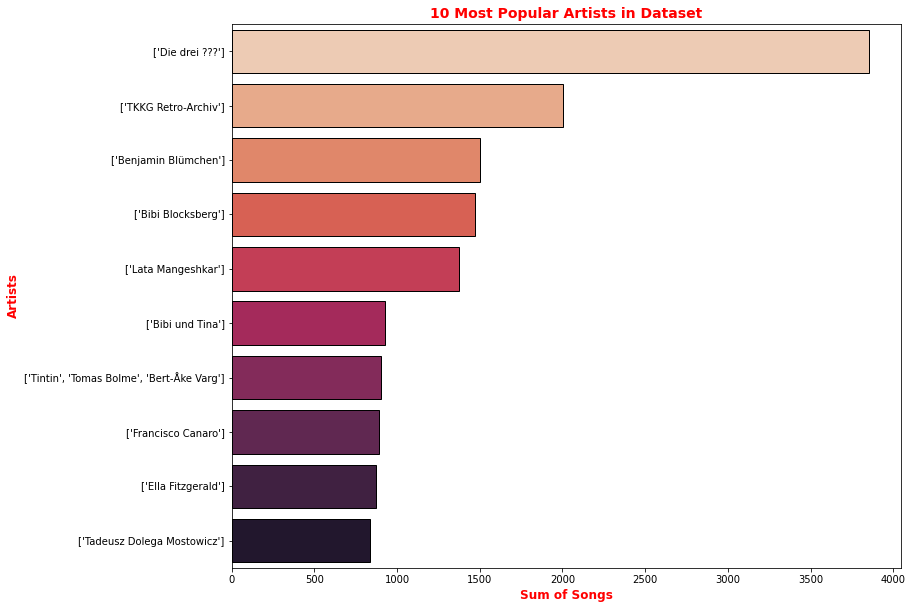

In [20]:
fig, ax = plt.subplots(figsize = (12, 10))

ax = sns.barplot(x = artist.values, y = artist.index, palette = 'rocket_r', orient = 'h', edgecolor = 'black',ax = ax)
ax.set_xlabel('Sum of Songs', c = 'r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists', c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('10 Most Popular Artists in Dataset', c = 'r', fontsize = 14, weight = 'bold')

plt.show()

In [39]:
df['year'] = df.index.year
df.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,year
release_date,,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922


In [33]:
# Sampling Data for Analysis
sample = df.sample(int(0.005*len(df)))
print(len(sample))

2933


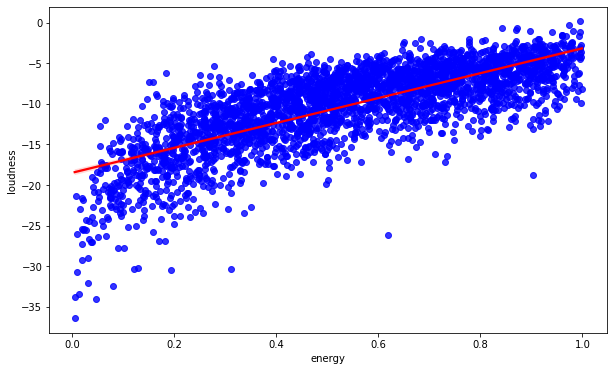

In [34]:
# Relationship between Loudness and Energy in Music¶
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="loudness", x="energy", color="b", line_kws={"color":"red"})
plt.show()

The scatter plot shows a positive correlation between loudness and energy.
The plot tells us that as the perceived loudness increases, the energy level also increases

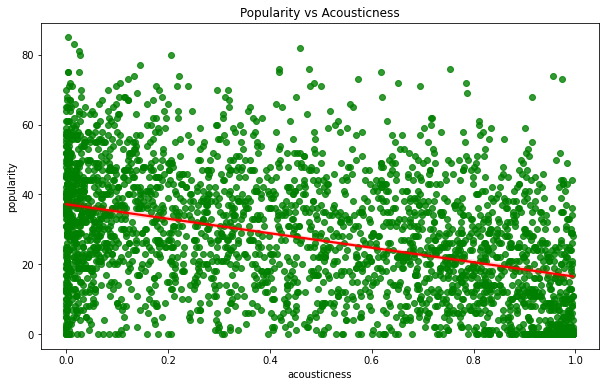

In [35]:
# Relationship between Popularity and Acousticness¶
plt.figure(figsize=(10,6))
sns.regplot(data = sample, y= "popularity", x = "acousticness", color = "g", line_kws={"color":"red"}).set(title="Popularity vs Acousticness")
plt.show()

The scatter plot shows a weak positive correlation between popularity and acousticness.
Songs with higher acousticness to be less popular.
The Data points are spread out widely across the graph indicating that there is a lot of variability in the relationship

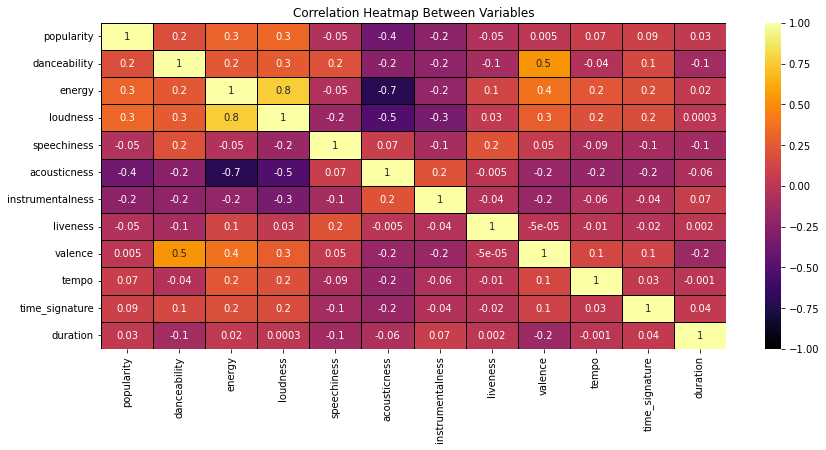

In [36]:
# Correlation Between Variables¶
# Drop non-numeric columns and calculate correlation matrix
corrdf = df.drop(["key", "mode", "explicit"], axis=1).corr(method="pearson", numeric_only=True)

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corrdf, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
plt.show()

There is a weak positive correlation between popularity and valence (how positive the music is).
There is a weak negative correlation between popularity and speechiness (how much talking is in the music).
There is a moderate positive correlation between danceability and energy (how energetic it is).
There is a weak positive correlation between instrumentalness and acousticness (Instrumentalness to vocals).

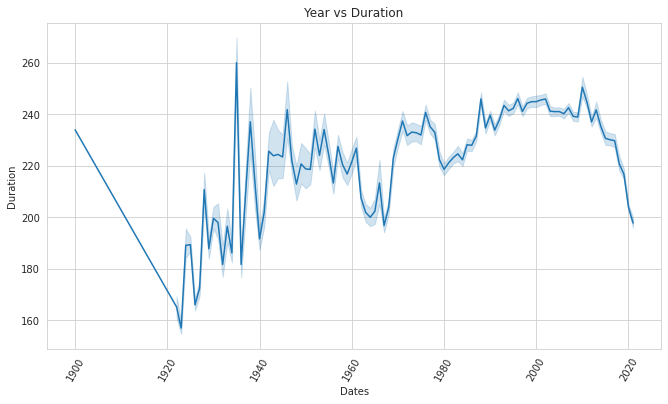

In [41]:
# Duration of Songs over the Years
sns.set_style(style="whitegrid")
plt.figure(figsize = (11,6))
sns.lineplot(data=df,x='year', y='duration').set(title = "Year vs Duration")
plt.xlabel('Dates')
plt.ylabel('Duration')
plt.xticks(rotation=60)
plt.show()

The average length of songs has steadily increased over time, reaching around 5 minutes by 2020.
However, since 2020 there is a constant drop in duration of songs .

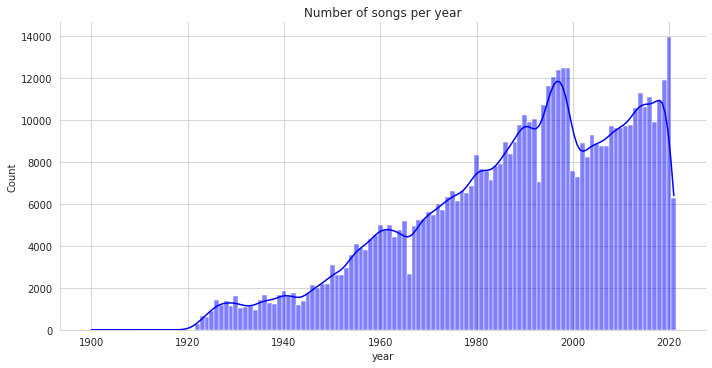

In [43]:
# Number of Songs per year
sns.displot(df['year'], discrete = True, aspect = 2, height = 5,kind = 'hist', kde = True, color ='blue').set(title = 'Number of songs per year')
plt.show()

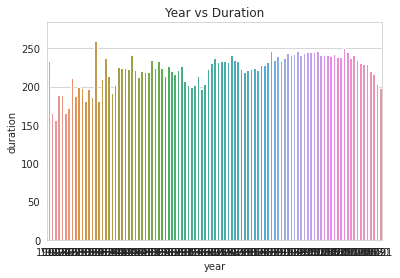

In [55]:
# Year Vs Duration
fig,ax=plt.subplots()
fig=sns.barplot(x=df["year"],y=df["duration"],ax=ax,errwidth=False).set(title="Year vs Duration")

In [46]:
# Most Danceable Songs
mostdanceable = df[['name','artists','danceability']].sort_values('danceability', ascending = False ).head(10)
mostdanceable

,name,artists,danceability
release_date,,,
2002-01-01,Puisorul cafeniu,['Malina Olinescu'],0.991
2011-07-12,Who Loves The Sun feat. Jo.Ke - Edit,"['Nu', 'Jo.Ke']",0.988
1989-01-01,Funky Cold Medina,['Tone-Loc'],0.988
1998-07-01,Tío Mario,['Susana Bosch'],0.988
2021-01-15,Cool - Leonardo La Mark Remix,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ...",0.987
2021-01-20,New Year (2021),"['xxrichbeats', 'Egor4ik']",0.987
2020-06-10,BABÁM,"['Horváth Tamás', 'Pixa']",0.986
2012-05-29,Go Girl,"['Pitbull', 'Trina', 'Young Bo']",0.986
2012-05-08,Go Girl,"['Pitbull', 'Trina', 'Young Bo']",0.986


In [47]:
mostenergy = df[['name','artists','energy']].sort_values('energy', ascending = False ).head(10)
mostenergy

,name,artists,energy
release_date,,,
2018-12-14,I Feel Love (Mixed) - Omar Sherif Remix,"['CRØW', 'Omar Sherif']",1.0
2017-01-28,Rain Sounds: Rain on Big Roof - Loopable,['Rainfall For Sleep'],1.0
1994-02-17,Transilvanian Hunger - Studio,['Darkthrone'],1.0
2013-12-20,Proper Order [Mix Cut] - Original Mix,"['Sneijder', 'Bryan Kearney']",1.0
2015-04-07,Soggy Afternoon,['Outside Broadcast Recordings'],1.0
2012-12-20,Amnesia (Mix Cut) - SoundLift’s Emotional Take,"['Running Man', 'SoundLift']",1.0
1938-01-01,Applause as Lionel Hampton Enters - Live,['Benny Goodman'],1.0
2014-12-19,Marathon [Mix Cut] - Simon O'Shine Remix,"[""Simon O'Shine"", 'Adam Navel']",1.0
1938-01-01,Applause; Martha Tilton Returns to Stage - Live,['Benny Goodman'],1.0


In [48]:
# Songs most likely to create positive feelings
mostvalence =df[['name','artists','valence']].sort_values('valence', ascending = False).head(10)
mostvalence

,name,artists,valence
release_date,,,
2008-12-01,Voluvisa,['Halldor Waren'],1.0
1968-01-01,The Little Girl From Mars,['Jean-Jacques Perrey'],1.0
2008-12-01,Lausavisur,['Halldor Waren'],1.0
2002-01-01,"Hæ, hó og dillidó (instrumental)",['Leikhópurinn Benedikt búálfur'],1.0
1978-01-01,Ο ύμνος του ΠΑΝΑΘΗΝΑΪΚΟΥ,['Λάκης Γαβαλάς'],1.0
1977-01-01,Les Petites Marionettes,['Raffi'],1.0
2002-01-04,Pasito Duranguense,['Montez de Durango'],1.0
1992-01-01,Noches Vacias,['Karolina'],1.0
2011-07-01,La carezza della mamma,['Matteo Bosi'],1.0
